In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
# pre-processing
df = pd.read_csv("master_data.csv")
df['RS%'] = df['RS%'].str.rstrip('%').astype('float') / 100.0
df['SB%'] = df['SB%'].str.rstrip('%').astype('float') / 100.0
df = df.dropna()
train, test = train_test_split(df)
xcols = ["Age", "G", "R", "H", "HR", "RBI", "SB", "SO", "BA", "SLG", "OPS", "Value Ranking", "WPA", "RS%", "SB%", "ISO"]
xcols_alt = ["R", "H", "HR", "RBI", "SO", "OPS", "Value Ranking"]

Train Accuracy: 92.949%
Valid Accuracy: 92.318%


<AxesSubplot:>

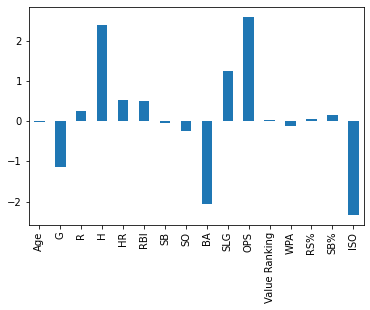

In [3]:
# Tuning hyperparameters for logistic regression

model = LogisticRegression(random_state=1)
params =  {
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']
}
grid = GridSearchCV(estimator=model,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=0)
grid.fit(train[xcols], train['allstars'])
p = grid.best_params_

# Logistic Reg post tuning

model = Pipeline([
    ("std", StandardScaler()),
    ("logr", LogisticRegression(penalty = p['penalty'], solver = p['solver'], random_state=2))
])
model.fit(train[xcols], train["allstars"])
model.score(test[xcols], test["allstars"])

print(f"Train Accuracy: {model.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {model.score(test[xcols], test['allstars'])*100:0.3f}%")
pd.Series(model["logr"].coef_.reshape(-1), index=xcols).plot.bar()

Train Accuracy: 92.674%
Valid Accuracy: 92.730%


<AxesSubplot:>

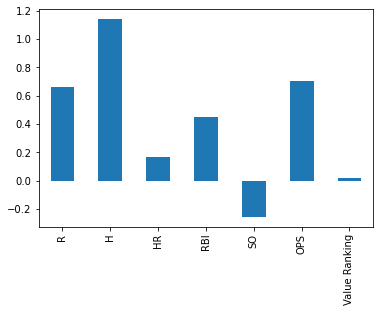

In [4]:
# Repeat with alt features
# Tuning hyperparameters for logistic regression

model = LogisticRegression(random_state=3)
params =  {
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']
}
grid = GridSearchCV(estimator=model,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=0)
grid.fit(train[xcols_alt], train['allstars'])
p = grid.best_params_

# Logistic Reg post tuning

model = Pipeline([
    ("std", StandardScaler()),
    ("logr", LogisticRegression(penalty = p['penalty'], solver = p['solver'], random_state=4))
])
model.fit(train[xcols_alt], train["allstars"])
model.score(test[xcols_alt], test["allstars"])

print(f"Train Accuracy: {model.score(train[xcols_alt], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {model.score(test[xcols_alt], test['allstars'])*100:0.3f}%")
pd.Series(model["logr"].coef_.reshape(-1), index=xcols_alt).plot.bar()

In [14]:
# Snubs
df['prediction'] = model.predict(df[xcols_alt])
df[df['allstars'] == 0][df['prediction'] == 1]

,Unnamed: 0,Name,Age,Tm,G,R,H,HR,RBI,SB,...,OPS,Value Ranking,Year,ID,WPA,RS%,SB%,ISO,allstars,prediction
181,181,Adrian Gonzalez,32.0,LAD,159,83,163,27,116,1,...,0.817,2.0,2014,Adrian Gonzalez2014,2.5,0.29,0.50,0.206,0,1
294,294,Victor Martinez,35.0,DET,151,87,188,32,103,3,...,0.974,23.0,2014,Victor Martinez2014,4.4,0.24,0.60,0.230,0,1
382,382,Albert Pujols,34.0,LAA,159,89,172,28,105,5,...,0.790,9.0,2014,Albert Pujols2014,2.8,0.31,0.83,0.194,0,1
395,395,Anthony Rendon,24.0,WSN,153,111,176,21,83,17,...,0.824,10.0,2014,Anthony Rendon2014,1.4,0.41,0.85,0.186,0,1
553,553,Jose Bautista,34.0,TOR,153,108,136,40,114,8,...,0.913,15.0,2015,Jose Bautista2015,3.7,0.32,0.80,0.285,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,3393,Bryce Harper,28.0,PHI,141,101,151,35,84,13,...,1.044,8.0,2021,Bryce Harper2021,4.7,0.30,0.81,0.305,0,1
3566,3566,Jorge Polanco,27.0,MIN,152,97,158,33,98,11,...,0.826,19.0,2021,Jorge Polanco2021,3.8,0.36,0.65,0.235,0,1
3589,3589,Austin Riley,24.0,ATL,160,91,179,33,107,0,...,0.898,11.0,2021,Austin Riley2021,1.0,0.28,0.00,0.227,0,1
3660,3660,Fernando Tatis Jr.,22.0,SDP,130,99,135,42,97,25,...,0.975,17.0,2021,Fernando Tatis Jr.2021,3.9,0.36,0.86,0.328,0,1
